In [107]:
#importing libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [111]:
df = pd.read_csv('/content/diabetes.csv')

In [112]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [113]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

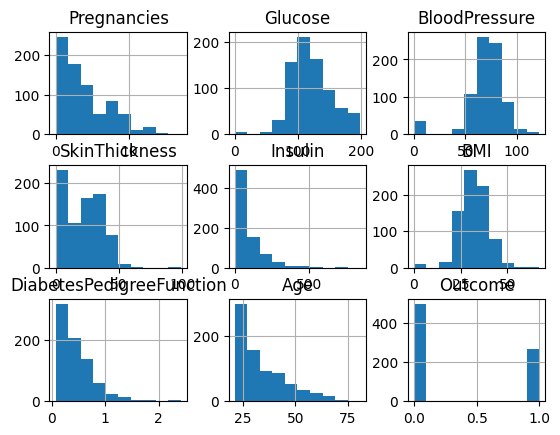

In [114]:
df.hist()

In [115]:
#filling null values

In [116]:
df['Pregnancies'].replace(0,df['Pregnancies'].median(),inplace= True)

In [117]:
df['Pregnancies'].value_counts()

3     186
1     135
2     103
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [118]:
df['Glucose'].value_counts()[0]

5

In [119]:
df['Glucose'].replace(0,df['Glucose'].median(),inplace= True)


In [120]:
df['BloodPressure'].value_counts()[0]

35

In [121]:
df['BloodPressure'].replace(0,df['BloodPressure'].median(),inplace= True)

In [122]:
df['SkinThickness'].value_counts()[0]

227

In [123]:
df['SkinThickness'].replace(0,df['SkinThickness'].median(),inplace= True)

In [124]:
df['Insulin'].value_counts()[0]

374

In [125]:
df['Insulin'].replace(0,df['Insulin'].median(),inplace= True)

In [126]:
df['BMI'].value_counts()[0]

11

In [127]:
df['BMI'].replace(0,df['BMI'].median(),inplace= True)

In [128]:
#outliers handling

<Axes: >

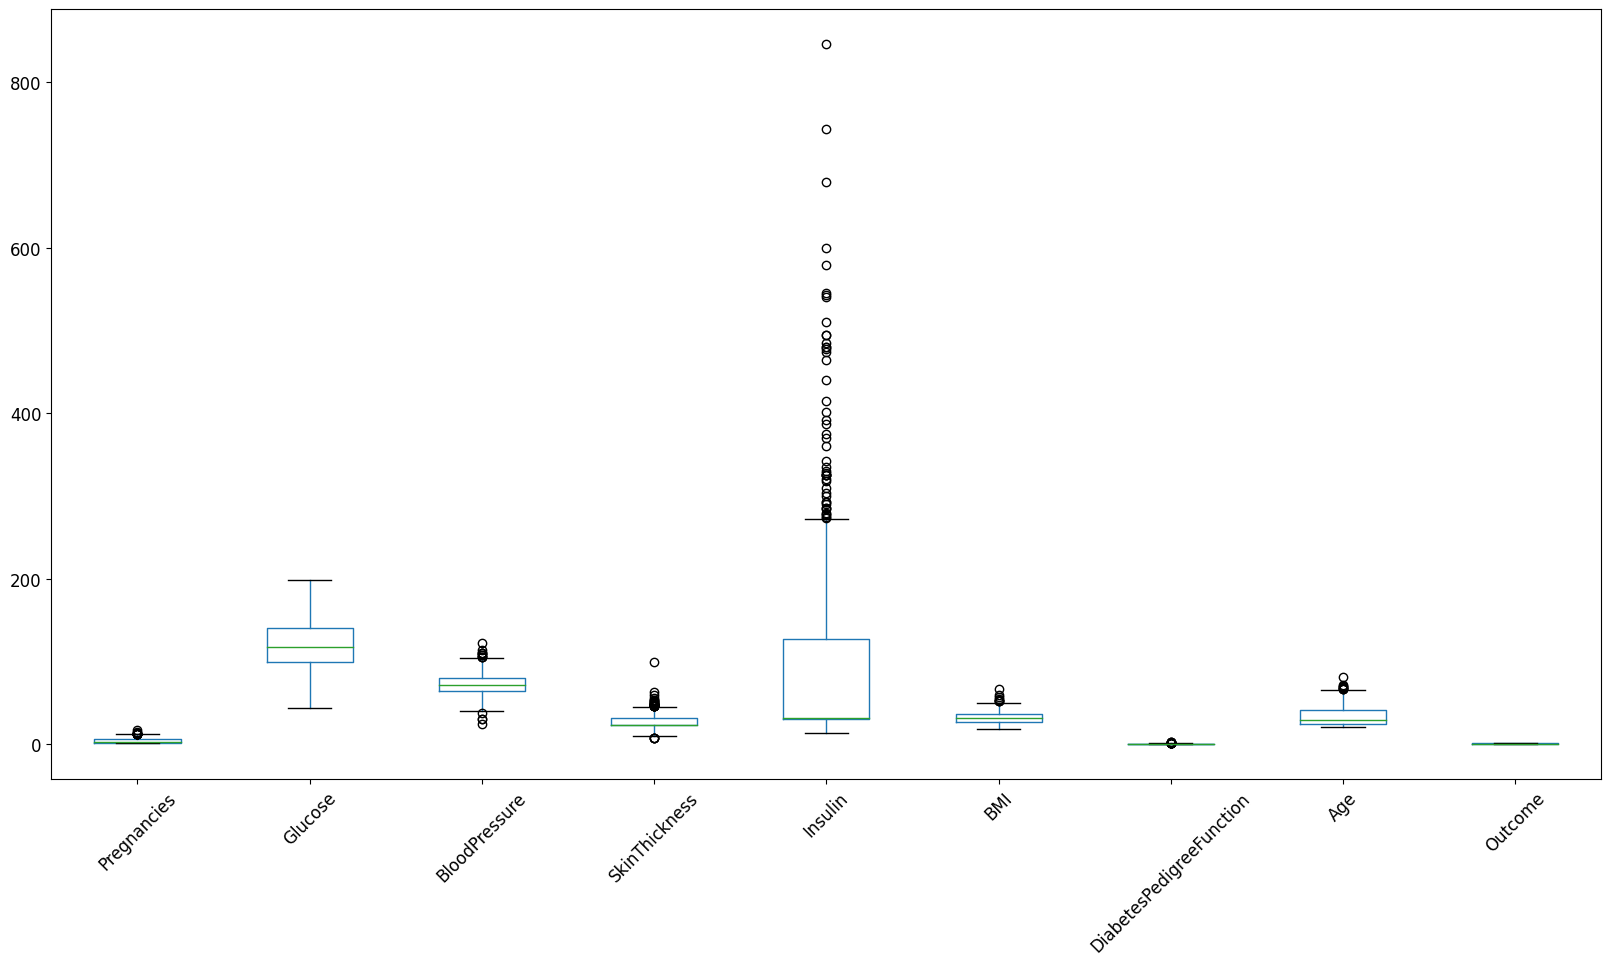

In [129]:
df.boxplot(grid=False, rot=45, fontsize=12,figsize=(20,10))

In [130]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


In [131]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [132]:
#IQR method

In [133]:
Q1 = df['Pregnancies'].quantile(0.25)

In [134]:
Q2 = df['Pregnancies'].quantile(0.5)

In [135]:
Q3 = df['Pregnancies'].quantile(0.75)

In [136]:
IQR = Q3-Q1

In [137]:
upper = Q3 + (1.5*IQR)

In [138]:
lower = Q1 - (1.5*IQR)

In [139]:
df[(df['Pregnancies']<lower) | (df['Pregnancies']>upper)].index

Int64Index([28, 72, 86, 88, 159, 274, 298, 323, 357, 455, 518, 635, 691, 744], dtype='int64')

In [140]:
df.loc[[28, 72, 86, 88, 159, 274, 298, 323, 357, 455, 518, 635, 691, 744]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110.0,22.2,0.245,57,0
72,13,126,90,23,30.5,43.4,0.583,42,1
86,13,106,72,54,30.5,36.6,0.178,45,0
88,15,136,70,32,110.0,37.1,0.153,43,1
159,17,163,72,41,114.0,40.9,0.817,47,1
274,13,106,70,23,30.5,34.2,0.251,52,0
298,14,100,78,25,184.0,36.6,0.412,46,1
323,13,152,90,33,29.0,26.8,0.731,43,1
357,13,129,72,30,30.5,39.9,0.569,44,1
455,14,175,62,30,30.5,33.6,0.212,38,1


In [141]:
df['Pregnancies'] = df['Pregnancies'].map(lambda x: upper if x > upper else x)

In [142]:
df['Pregnancies'].describe()

count    768.000000
mean       4.250000
std        2.935642
min        1.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       12.000000
Name: Pregnancies, dtype: float64

In [143]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.250000,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,2.935642,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,12.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [144]:
#gluecose, Blood pressure, BMI outliers are NOT fixed as it can have such values in real life scenarios.


In [148]:
xtr = ['SkinThickness', 'Insulin','DiabetesPedigreeFunction']
for i in xtr:
  Q1 = df[i].quantile(0.25)
  Q2 = df[i].quantile(0.5)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  upper = Q3 + (1.5*IQR)
  lower = Q1 - (1.5*IQR)
  df[(df[i]<lower) | (df[i]>upper)].index
  df[i] = df[i].map(lambda x: upper if x > upper else x)


In [146]:
#outliers have been capped

In [149]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.250000,121.656250,72.386719,27.106120,86.139811,32.450911,0.458914,33.240885,0.348958
std,2.935642,30.438286,12.096642,8.470449,76.287377,6.875366,0.285596,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,12.000000,199.000000,122.000000,45.500000,272.375000,67.100000,1.200000,81.000000,1.000000


In [150]:
df['Outcome'].unique()

array([1, 0])

In [151]:
#encoding is not necessary as dataset is already numerical and the target column is already 0 or 1

In [152]:
df.dtypes

Pregnancies                 float64
Glucose                       int64
BloodPressure                 int64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [153]:
#splitting data

In [154]:
x = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [155]:
#scaling

In [156]:
min_max = MinMaxScaler()

In [157]:
x.loc[:,:] = min_max.fit_transform(x)

In [158]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.295455,0.501008,0.493742,0.522237,0.279206,0.291430,0.339496,0.204015
std,0.266877,0.196376,0.123435,0.220012,0.295258,0.140601,0.254542,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.359677,0.408163,0.415584,0.063861,0.190184,0.147727,0.050000
50%,0.181818,0.470968,0.489796,0.415584,0.066763,0.282209,0.262478,0.133333
75%,0.454545,0.620968,0.571429,0.649351,0.438316,0.376278,0.488636,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
#train test split

In [160]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [161]:
#logistic regression

In [162]:
log_reg = LogisticRegression()

In [163]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [164]:
y_pred = log_reg.predict(x_test)

In [165]:
accuracy_score(y_test,y_pred)

0.7792207792207793

In [166]:
f1_score(y_test,y_pred)

0.6666666666666667

In [167]:
#kNN

In [168]:
#when p = 2

In [169]:
acc_knn = []
k_val = np.arange(3,15)
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p = 2)
  knn.fit(x_train,y_train )
  y_pred_knn = knn.predict(x_test)
  acc = accuracy_score(y_test, y_pred_knn)
  acc_knn.append(acc)

In [170]:
acc_knn

[0.6753246753246753,
 0.6558441558441559,
 0.6948051948051948,
 0.6948051948051948,
 0.7077922077922078,
 0.7077922077922078,
 0.7207792207792207,
 0.7272727272727273,
 0.7597402597402597,
 0.7337662337662337,
 0.7337662337662337,
 0.7467532467532467]

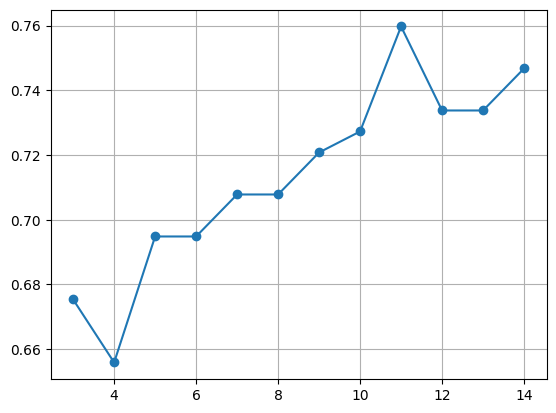

In [171]:
plt.plot(k_val,acc_knn,'o-')
plt.grid()


In [172]:
# when p = 1
acc_knn_p = []
k_val = np.arange(3,15)
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p = 1)
  knn.fit(x_train,y_train )
  y_pred_knn = knn.predict(x_test)
  acc = accuracy_score(y_test, y_pred_knn)
  acc_knn_p.append(acc)

In [173]:
acc_knn_p

[0.6753246753246753,
 0.6883116883116883,
 0.7012987012987013,
 0.7012987012987013,
 0.7142857142857143,
 0.7402597402597403,
 0.7467532467532467,
 0.7272727272727273,
 0.7467532467532467,
 0.7532467532467533,
 0.7402597402597403,
 0.7532467532467533]

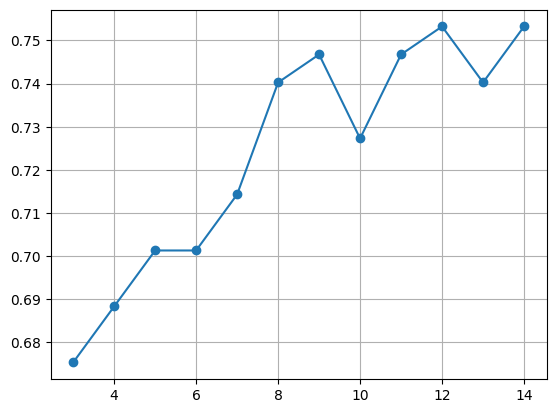

In [70]:
plt.plot(k_val,acc_knn_p,'o-')
plt.grid()


In [71]:
#max accuracy of knn:
#                 when k = 14 or 12, accuracy = 0.7532467532467533 (minkowski, at p = 1)
#                 when k = 11 , accuracy = 0.7597402597402597 (minkowski, at p = 2)


In [174]:
  knn = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski',p = 2)
  knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=11)

In [175]:
y_pred_knn = knn.predict(x_test)

In [176]:
acc = accuracy_score(y_test, y_pred_knn)

In [177]:
acc

0.7597402597402597

In [178]:
f1_score(y_test,y_pred_knn)

0.6542056074766355

In [179]:
confusion_matrix(y_test,y_pred_knn)

array([[82, 17],
       [20, 35]])

In [180]:
#SVM

In [181]:
acc_scr_svm = []

In [182]:
ker = ['linear','rbf','poly']

In [183]:
for i in ker:
  svc = SVC(kernel = i)
  svc.fit(x_train,y_train)
  y_pred = svc.predict(x_test)
  acc_scr = accuracy_score(y_test, y_pred)
  acc_scr_svm.append(acc_scr)



In [184]:
acc_scr_svm

[0.7857142857142857, 0.7597402597402597, 0.7467532467532467]

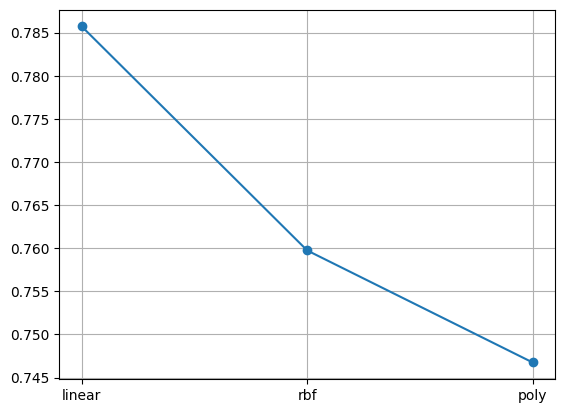

In [185]:
plt.plot(ker,acc_scr_svm, 'o-')
plt.grid()

In [186]:
deg = [2,3,4]
accr_poly_deg = []
for i in deg:
   svc = SVC(kernel = 'poly', degree = i)
   svc.fit(x_train,y_train)
   y_pred = svc.predict(x_test)
   acc_scr = accuracy_score(y_test, y_pred)
   accr_poly_deg.append(acc_scr)


In [187]:
accr_poly_deg

[0.7857142857142857, 0.7467532467532467, 0.7272727272727273]

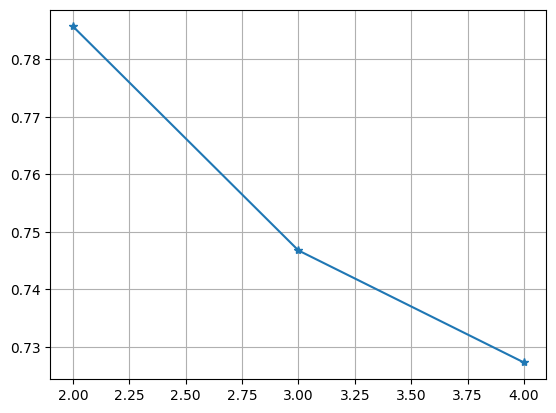

In [188]:
plt.plot(deg,accr_poly_deg,'*-')
plt.grid()

In [189]:
#svm with (kernel = 'linear') and (kernel = 'poly' ,degree = 2) both return same  accuracy score of 0.7857142857142857
#choosing linear kernel of the above two max accurate models to make svm model for this dataset


In [190]:
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [191]:
y_pred = svc.predict(x_test)



In [192]:
acc_scr = accuracy_score(y_test, y_pred)

In [193]:
acc_scr

0.7857142857142857

In [194]:
f1_score(y_test, y_pred)

0.6796116504854369

In [195]:
confusion_matrix(y_test, y_pred)

array([[86, 13],
       [20, 35]])

In [196]:
#Naive Bayers

In [197]:
nb = GaussianNB()

In [198]:
nb.fit(x_train,y_train)


GaussianNB()

In [199]:
y_pred = nb.predict(x_test)

In [200]:
accuracy_score(y_test,y_pred)

0.7467532467532467

In [201]:
f1_score(y_test,y_pred)

0.6608695652173913

In [202]:
confusion_matrix(y_test,y_pred)

array([[77, 22],
       [17, 38]])

In [203]:
#Out of Logistic regression, KNN, SVM and NaiveBayers models; SVM gave the most accurate predictions